In [51]:
import numpy as np

class PerceptronModel:
    def __init__(self, no_of_featues):
        
        self.weights = np.zeros(no_of_featues)
        self.bias = 0.
        
    def predict(self,features):
        #calculate the weighted sum
        weighted_sum = np.dot(features, self.weights) + self.bias
        # use step function as activation function
        if weighted_sum > 0:
          return 1
        else:
          return 0            
    
    def train(self, features, label):
        
        # Make a prediction based on current weights.
        prediction = self.predict(features)
        # Update the weights if the prediction is wrong.
        if prediction != label:
            gradient = label - prediction; # how far off are we?
            for i in range(len(self.weights)):
                self.weights[i] += gradient * features[i] #The perceptron update rule
            
            self.bias += gradient;
            
        return self # return weights and bias


In [41]:
"""
# Create the model
p = PerceptronModel(2);

# Train the model with input with a diagonal boundary.
for i in range(0,100):
    p.train(np.array([1, 1]), 1)
    p.train(np.array([1, 0]), 0)
    p.train(np.array([0, 1]), 0)
    p.train(np.array([0, 0]), 0)
#
print(p.predict(np.array([0, 0]))) # 0

# p.predict([0, 1]); # 0
# p.predict([1, 0]); # 0
# p.predict([1, 1]); # 1

"""



'\n# Create the model\np = PerceptronModel(2);\n\n# Train the model with input with a diagonal boundary.\nfor i in range(0,100):\n    p.train(np.array([1, 1]), 1)\n    p.train(np.array([1, 0]), 0)\n    p.train(np.array([0, 1]), 0)\n    p.train(np.array([0, 0]), 0)\n#\nprint(p.predict(np.array([0, 0]))) # 0\n\n# p.predict([0, 1]); # 0\n# p.predict([1, 0]); # 0\n# p.predict([1, 1]); # 1\n\n'

In [55]:
#
#Friendly or not friendly example using teeth and size features
#
#normalized teeth and size features
# X1 data - teeth number - is scaled to [0,1]
X1 = np.array([0.27, 0.09, 0.00, 0.23, 0., 1.00, 0.32])
# X2 data - size scaled to [0,1]
X2 = np.array([0.50, 0.48, 0.12, 0.00, 1.00, 0.73, 0.33])

# labels data or the output
labels = np.array([1, 1, 1, 0, 1, 0, 0])

print (len(X1))
for j in range(len(X1)):
        print(X1[j])
# Create the perceptron model with two features
p = PerceptronModel(2);

# Train the model using 100 iterations
for i in range (0,100):
    for j in range(len(X1)):
        p.train(np.array([X1[j], X2[j]]), labels[j]);


print("weights and bias: ")
print(p.bias)
print(p.weights)
#
weights = p.weights
bias = p.bias

# y = (-w1/w2)x + (-bias/w2) = a*x + b
# line coefficients
a = -weights[0] / weights[1]
b = -bias / weights[1]

print('a and b: ')

print(a)
print(b)
# calculating tw0 points to draw the line
# x2 = a*x1 +b : x1 = 0 --> x2 = b, x1 = 1 --> x2 = a + b
# line points:  (0,b) and (1, a+b)

# It is important to notice that it will converge to any solution
# that satisfies the training set.
# Try to retrain to see if it changes.

# Now we can use it to categorize samples it's never seen.
# For example: something with 29 teeth and a size of 23 cm, likely to be nice ?
predictionResult = p.predict(np.array([0.76,0.07])) # teeth number, size of the animal
print(predictionResult)

7
0.27
0.09
0.0
0.23
0.0
1.0
0.32
weights and bias: 
0.0
[-1.48  0.88]
a and b: 
1.681818181818182
-0.0
0


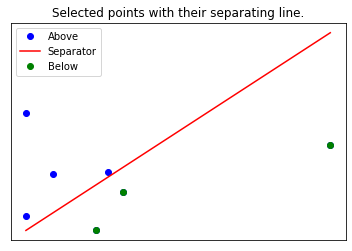

In [61]:
import matplotlib.pyplot as pl
%matplotlib inline

x = np.linspace(0,1);
# Using weights w to compute a,b for a line y=a*x+b
f = lambda x: a * x + b;

fig =pl.figure()
figa = pl.gca();

pl.plot(X1,X2,'bo');
pl.plot(x,f(x),'r')
#
# Linearly separate the points by the line
points = np.zeros([len(X1),1]);

for i in range(len(X1)):
    if(f(X1[i]) > X2[i]):
        # Point is below line
        points[i] = 1;
        pl.plot(X1[i],X2[i],'go')
    else:
        # Point is above line
        points[i] = -1;
        
pl.legend(['Above','Separator','Below'],loc=0)
pl.title('Selected points with their separating line.')
figa.axes.get_xaxis().set_visible(False)
figa.axes.get_yaxis().set_visible(False)